In [7]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
def show_images(dataloader):
    inputs, labels = next(iter(dataloader))
    fig, axes = plt.subplots(2, 3, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        img = inputs[i]
        ax.imshow(img)
        ax.set_title(f"Label: {labels[i].item()}")
        ax.axis("off")
    plt.show()

dict_keys(['train_0.005', 'train_0.01', 'train_0.02', 'train_0.05', 'train_0.10', 'train_0.20', 'test'])


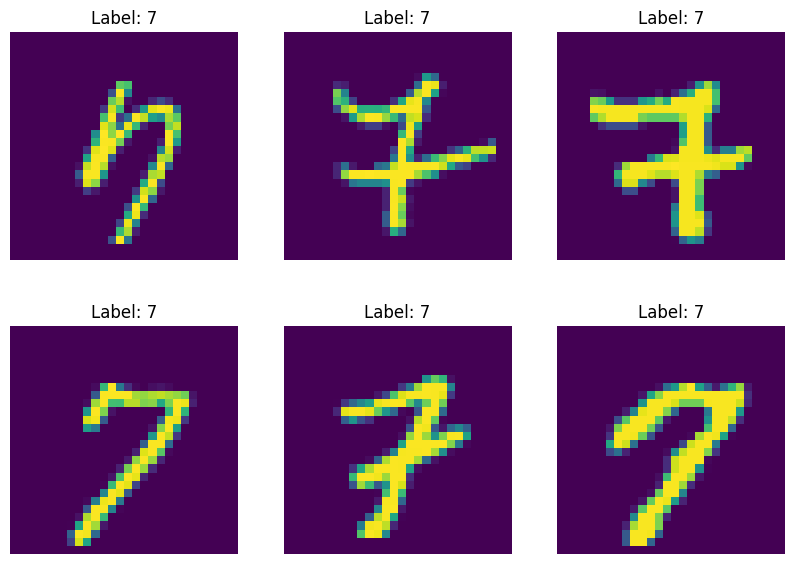

In [8]:
import pickle
file_name = "/Users/max/MasterThesisData/Binary17_MNIST_data_loaders.pkl"
with open(file_name, "rb") as f:
    Binary17_MNIST = pickle.load(f)

print(Binary17_MNIST.keys())
train_data_0005 = Binary17_MNIST["train_0.005"]
show_images(train_data_0005)

In [9]:
import torch
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)
import random
random.seed(42)
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
train_data_0005 = Binary17_MNIST["train_0.005"]
train_data_001 = Binary17_MNIST["train_0.01"]
train_data_002 = Binary17_MNIST["train_0.02"]
train_data_005 = Binary17_MNIST["train_0.05"]
train_data_010 = Binary17_MNIST["train_0.10"]
train_data_020 = Binary17_MNIST["train_0.20"]
test_data = Binary17_MNIST["test"]

### 0.5\%

In [10]:
Train_DataLoader = train_data_0005 # 0.005 0.5%
Test_DataLoader = test_data
print("Dataset: Binary17_MNIST")
print("Imbalanced Ratio: 0.005")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
# labels = np.unique(y_train)
# print("Labels:", labels)
print("1 is negative, 7 is positive")
train_label1 = np.count_nonzero(y_train == 1)
train_label7 = np.count_nonzero(y_train == 7)
print("Train_label1:", train_label1)
print("Train_label7:", train_label7)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label1 = np.count_nonzero(y_test == 1)
test_label7 = np.count_nonzero(y_test == 7)
print("Test_label1:", test_label1)
print("Test_label7:", test_label7)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)


import self_metrics
TP, FP, FN, TN = self_metrics.Binary17_got_confusion_matrix(y_test, y_pred)
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary17_MNIST
Imbalanced Ratio: 0.005
1 is negative, 7 is positive
Train_label1: 31
Train_label7: 6265
Test_label1: 1135
Test_label7: 1028
X_train.shape: (6296, 784)
y_train.shape: (6296,)
X_test.shape: (2163, 784)
y_test.shape: (2163,)
y_pred.shape: (2163,)
TP: 1026
FP: 221
FN: 2
TN: 914
Accuracy: 0.8969
Misclassification rate: 0.1031
Sensitivity (Recall): 0.9981
Specificity: 0.8053
Precision: 0.8228
Negative Predictive Value: 0.9978
G-mean: 0.8965
F-measure: 0.9020
Discriminant Power: 4.2231
F2-measure: 0.8527
InvF0.5-measure: 0.9573
AGF: 0.9035
Balanced Accuracy: 0.9017
Matthew's Correlation Coefficient: 0.8119
Cohen's Kappa: 0.7954
Youden's Index: 0.8033
Positive Likelihood Ratio: 5.1258
Negative Likelihood Ratio: 0.0024
None


### 1%

In [11]:
Train_DataLoader = train_data_001 # 0.01 1%
Test_DataLoader = test_data
print("Dataset: Binary17_MNIST")
print("Imbalanced Ratio: 0.01")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("1 is negative, 7 is positive")
train_label1 = np.count_nonzero(y_train == 1)
train_label7 = np.count_nonzero(y_train == 7)
print("Train_label1:", train_label1)
print("Train_label7:", train_label7)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label1 = np.count_nonzero(y_test == 1)
test_label7 = np.count_nonzero(y_test == 7)
print("Test_label1:", test_label1)
print("Test_label7:", test_label7)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary17_got_confusion_matrix(y_test, y_pred)
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary17_MNIST
Imbalanced Ratio: 0.01
1 is negative, 7 is positive
Train_label1: 62
Train_label7: 6265
Test_label1: 1135
Test_label7: 1028
X_train.shape: (6327, 784)
y_train.shape: (6327,)
X_test.shape: (2163, 784)
y_test.shape: (2163,)
y_pred.shape: (2163,)
TP: 1025
FP: 108
FN: 3
TN: 1027
Accuracy: 0.9487
Misclassification rate: 0.0513
Sensitivity (Recall): 0.9971
Specificity: 0.9048
Precision: 0.9047
Negative Predictive Value: 0.9971
G-mean: 0.9498
F-measure: 0.9486
Discriminant Power: 4.4581
F2-measure: 0.9218
InvF0.5-measure: 0.9771
AGF: 0.9490
Balanced Accuracy: 0.9510
Matthew's Correlation Coefficient: 0.9018
Cohen's Kappa: 0.8976
Youden's Index: 0.9019
Positive Likelihood Ratio: 10.4786
Negative Likelihood Ratio: 0.0032
None


### 2%

In [12]:
Train_DataLoader = train_data_002 # 0.02 2%
Test_DataLoader = test_data
print("Dataset: Binary17_MNIST")
print("Imbalanced Ratio: 0.02")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("1 is negative, 7 is positive")
train_label1 = np.count_nonzero(y_train == 1)
train_label7 = np.count_nonzero(y_train == 7)
print("Train_label1:", train_label1)
print("Train_label7:", train_label7)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label1 = np.count_nonzero(y_test == 1)
test_label7 = np.count_nonzero(y_test == 7)
print("Test_label1:", test_label1)
print("Test_label7:", test_label7)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary17_got_confusion_matrix(y_test, y_pred)
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary17_MNIST
Imbalanced Ratio: 0.02
1 is negative, 7 is positive
Train_label1: 125
Train_label7: 6265
Test_label1: 1135
Test_label7: 1028
X_train.shape: (6390, 784)
y_train.shape: (6390,)
X_test.shape: (2163, 784)
y_test.shape: (2163,)
y_pred.shape: (2163,)
TP: 1021
FP: 54
FN: 7
TN: 1081
Accuracy: 0.9718
Misclassification rate: 0.0282
Sensitivity (Recall): 0.9932
Specificity: 0.9524
Precision: 0.9498
Negative Predictive Value: 0.9936
G-mean: 0.9726
F-measure: 0.9710
Discriminant Power: 4.3992
F2-measure: 0.9581
InvF0.5-measure: 0.9842
AGF: 0.9711
Balanced Accuracy: 0.9728
Matthew's Correlation Coefficient: 0.9445
Cohen's Kappa: 0.9436
Youden's Index: 0.9456
Positive Likelihood Ratio: 20.8754
Negative Likelihood Ratio: 0.0071
None


### 5%

In [13]:
Train_DataLoader = train_data_005 # 0.05 5%
Test_DataLoader = test_data
print("Dataset: Binary17_MNIST")
print("Imbalanced Ratio: 0.05")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("1 is negative, 7 is positive")
train_label1 = np.count_nonzero(y_train == 1)
train_label7 = np.count_nonzero(y_train == 7)
print("Train_label1:", train_label1)
print("Train_label7:", train_label7)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label1 = np.count_nonzero(y_test == 1)
test_label7 = np.count_nonzero(y_test == 7)
print("Test_label1:", test_label1)
print("Test_label7:", test_label7)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary17_got_confusion_matrix(y_test, y_pred)
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary17_MNIST
Imbalanced Ratio: 0.05
1 is negative, 7 is positive
Train_label1: 313
Train_label7: 6265
Test_label1: 1135
Test_label7: 1028
X_train.shape: (6578, 784)
y_train.shape: (6578,)
X_test.shape: (2163, 784)
y_test.shape: (2163,)
y_pred.shape: (2163,)
TP: 1022
FP: 15
FN: 6
TN: 1120
Accuracy: 0.9903
Misclassification rate: 0.0097
Sensitivity (Recall): 0.9942
Specificity: 0.9868
Precision: 0.9855
Negative Predictive Value: 0.9947
G-mean: 0.9905
F-measure: 0.9898
Discriminant Power: 5.2105
F2-measure: 0.9872
InvF0.5-measure: 0.9924
AGF: 0.9898
Balanced Accuracy: 0.9905
Matthew's Correlation Coefficient: 0.9806
Cohen's Kappa: 0.9805
Youden's Index: 0.9809
Positive Likelihood Ratio: 75.2250
Negative Likelihood Ratio: 0.0059
None


### 10%

In [14]:
Train_DataLoader = train_data_010 # 0.1 10%
Test_DataLoader = test_data
print("Dataset: Binary17_MNIST")
print("Imbalanced Ratio: 0.10")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("1 is negative, 7 is positive")
train_label1 = np.count_nonzero(y_train == 1)
train_label7 = np.count_nonzero(y_train == 7)
print("Train_label1:", train_label1)
print("Train_label7:", train_label7)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label1 = np.count_nonzero(y_test == 1)
test_label7 = np.count_nonzero(y_test == 7)
print("Test_label1:", test_label1)
print("Test_label7:", test_label7)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary17_got_confusion_matrix(y_test, y_pred)
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary17_MNIST
Imbalanced Ratio: 0.10
1 is negative, 7 is positive
Train_label1: 626
Train_label7: 6265
Test_label1: 1135
Test_label7: 1028
X_train.shape: (6891, 784)
y_train.shape: (6891,)
X_test.shape: (2163, 784)
y_test.shape: (2163,)
y_pred.shape: (2163,)
TP: 1023
FP: 18
FN: 5
TN: 1117
Accuracy: 0.9894
Misclassification rate: 0.0106
Sensitivity (Recall): 0.9951
Specificity: 0.9841
Precision: 0.9827
Negative Predictive Value: 0.9955
G-mean: 0.9896
F-measure: 0.9889
Discriminant Power: 5.2096
F2-measure: 0.9852
InvF0.5-measure: 0.9926
AGF: 0.9889
Balanced Accuracy: 0.9896
Matthew's Correlation Coefficient: 0.9788
Cohen's Kappa: 0.9787
Youden's Index: 0.9793
Positive Likelihood Ratio: 62.7489
Negative Likelihood Ratio: 0.0049
None


### 20%

In [15]:
Train_DataLoader = train_data_020 # 0.2 20%
Test_DataLoader = test_data
print("Dataset: Binary17_MNIST")
print("Imbalanced Ratio: 0.20")
X_train = [] # features
y_train = [] # labels

for batch in Train_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        #print(f"Original shape: {img.shape}")  #  (1, 28, 28)
        flattened_img = img.flatten()           #  (784,)
        #print(f"Flattened shape: {flattened_img.shape}")
        X_train.append(flattened_img)
        y_train.append(label)

X_test = [] # features
y_test = [] # labels
for batch in Test_DataLoader:
    images, labels = batch  # images: (batch_size, 1, 28, 28), labels: (batch_size,)
    if hasattr(images, 'numpy'): # images is tensor
        images = images.numpy()
    # batch_size = 64
    for img, label in zip(images, labels):
        flattened_img = img.flatten()           #  (784,)
        X_test.append(flattened_img)
        y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
print("1 is negative, 7 is positive")
train_label1 = np.count_nonzero(y_train == 1)
train_label7 = np.count_nonzero(y_train == 7)
print("Train_label1:", train_label1)
print("Train_label7:", train_label7)
X_test = np.array(X_test)
y_test = np.array(y_test)

test_label1 = np.count_nonzero(y_test == 1)
test_label7 = np.count_nonzero(y_test == 7)
print("Test_label1:", test_label1)
print("Test_label7:", test_label7)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("y_pred.shape:", y_pred.shape)



### Metrics
import self_metrics
TP, FP, FN, TN = self_metrics.Binary17_got_confusion_matrix(y_test, y_pred)
metrics = self_metrics.Binary_got_metrics(TP, FP, FN, TN)
print(metrics)


Dataset: Binary17_MNIST
Imbalanced Ratio: 0.20
1 is negative, 7 is positive
Train_label1: 1253
Train_label7: 6265
Test_label1: 1135
Test_label7: 1028
X_train.shape: (7518, 784)
y_train.shape: (7518,)
X_test.shape: (2163, 784)
y_test.shape: (2163,)
y_pred.shape: (2163,)
TP: 1023
FP: 9
FN: 5
TN: 1126
Accuracy: 0.9935
Misclassification rate: 0.0065
Sensitivity (Recall): 0.9951
Specificity: 0.9921
Precision: 0.9913
Negative Predictive Value: 0.9956
G-mean: 0.9936
F-measure: 0.9932
Discriminant Power: 5.5961
F2-measure: 0.9920
InvF0.5-measure: 0.9944
AGF: 0.9932
Balanced Accuracy: 0.9936
Matthew's Correlation Coefficient: 0.9870
Cohen's Kappa: 0.9870
Youden's Index: 0.9872
Positive Likelihood Ratio: 125.4977
Negative Likelihood Ratio: 0.0049
None
